## Notes/Observations
- This is a more modern implemeatationof LeNet-5.
- Hence ReLU is used as the activation function instead of tanh.
- Parameters: 44k
- Test Accuracy: 89.77%

## Import the required libraries

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [ ]:
print(keras.__version__)

2.4.3


## Load and explore the data

In [ ]:
(x_train, y_train),(x_test, y_test)= keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Dimensions and datatype of')
print('x_train:', x_train.shape, '\tdtype:', x_train.dtype)
print('y_train:', y_train.shape, '\t\tdtype:', y_train.dtype)
print('x_test:', x_test.shape, '\tdtype:', x_test.dtype)
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype)

Dimensions and datatype of
x_train: (60000, 28, 28) 	dtype: uint8
y_train: (60000,) 		dtype: uint8
x_test: (10000, 28, 28) 	dtype: uint8
y_test: (10000,) 		dtype: uint8


## Normalize the data

In [ ]:
mean = np.mean(x_train)
print(mean)

72.94035223214286


In [ ]:
std = np.std(x_train)
print(std)

90.02118235130519


In [ ]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [ ]:
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

## Reshape input and one hot encode labels

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
from keras.utils import to_categorical
y_train =  to_categorical(y_train)
y_test  =  to_categorical(y_test)

In [ ]:
print('Dimensions and datatype of')
print('x_train:', x_train.shape, '\tdtype:', x_train.dtype)
print('y_train:', y_train.shape, '\t\tdtype:', y_train.dtype)
print('x_test:', x_test.shape, '\tdtype:', x_test.dtype)
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype)

Dimensions and datatype of
x_train: (60000, 28, 28, 1) 	dtype: float32
y_train: (60000, 10) 		dtype: float32
x_test: (10000, 28, 28, 1) 	dtype: float32
y_test: (10000, 10) 		dtype: float32


## Build the LeNet-5 model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(6, (5,5), strides=(1,1), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(16, (5,5), strides=(1,1), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(10, activation='softmax'))  

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Compile and Train the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Saved Models')

from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('Fashion_MNIST_LeNet_5.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

Mounted at /content/drive


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=(0.2), batch_size=128, epochs=20, callbacks=mc)

Epoch 1/20
375/375 [==============================] - 10s 9ms/step - loss: 1.0033 - accuracy: 0.6498 - val_loss: 0.5255 - val_accuracy: 0.7956

Epoch 00001: val_loss improved from inf to 0.52553, saving model to Fashion_MNIST_LeNet_5.h5
Epoch 2/20
375/375 [==============================] - 2s 7ms/step - loss: 0.4884 - accuracy: 0.8180 - val_loss: 0.4592 - val_accuracy: 0.8278

Epoch 00002: val_loss improved from 0.52553 to 0.45918, saving model to Fashion_MNIST_LeNet_5.h5
Epoch 3/20
375/375 [==============================] - 2s 7ms/step - loss: 0.4278 - accuracy: 0.8433 - val_loss: 0.4109 - val_accuracy: 0.8491

Epoch 00003: val_loss improved from 0.45918 to 0.41087, saving model to Fashion_MNIST_LeNet_5.h5
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3779 - accuracy: 0.8630 - val_loss: 0.3899 - val_accuracy: 0.8574

Epoch 00004: val_loss improved from 0.41087 to 0.38986, saving model to Fashion_MNIST_LeNet_5.h5
Epoch 5/20
375/375 [=======================

## Test the model

In [ ]:
# Loading model with the lowest validation loss
model = keras.models.load_model("Fashion_MNIST_LeNet_5.h5")

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Set')
print('Loss:', test_loss)
print('Accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3028 - accuracy: 0.8977
Test Set
Loss: 0.302764892578125
Accuracy 0.8977000117301941


## Prediction

Below is the information on Fashion MNIST Class Labels.

In [ ]:
class_labels = dict([(0, 'T-shirt/Top'), (1, 'Trouser'), (2, 'Pullover'),  (3, 'Dress'), (4, 'Coat'), (5, 'Sandal'), (6, 'Shirt'), (7, 'Sneaker'), (8, 'Bag'), (9, 'Ankel Boot')])
print('Label', "\t", 'Class\n')
for x in class_labels:
  print(x, "\t", class_labels[x])

Label 	 Class

0 	 T-shirt/Top
1 	 Trouser
2 	 Pullover
3 	 Dress
4 	 Coat
5 	 Sandal
6 	 Shirt
7 	 Sneaker
8 	 Bag
9 	 Ankel Boot


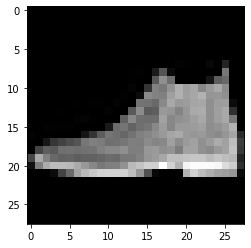

In [ ]:
# Set the index of the image in test set for which the output must be predicted
# Valid ind values range is: 0, 1, 2, ... 9999
ind = 0
plt.imshow(((x_test[ind]*std + mean).astype(np.uint8)).squeeze(), cmap='gray')

In [ ]:
pred = model.predict(x_test[ind].reshape(1,28,28,1))
print('The pridicted probability different classes is')
print(pred)
print('The predicted class is', pred.argmax(), class_labels[pred.argmax()])
print('The actual class is', y_test[ind].argmax(), class_labels[y_test[ind].argmax()])

The pridicted probability different classes is
[[7.5927682e-09 2.2688645e-10 1.4038468e-08 6.4849948e-09 2.1179638e-09
  1.5603528e-04 5.8889452e-08 1.8234756e-03 1.5395200e-08 9.9802041e-01]]
The predicted class is 9 Ankel Boot
The actual class is 9 Ankel Boot


## Loss and Accuracy Curves

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
x_axis = range(1, len(train_loss)+1)

Text(0.5, 1.0, 'Loss Curve')

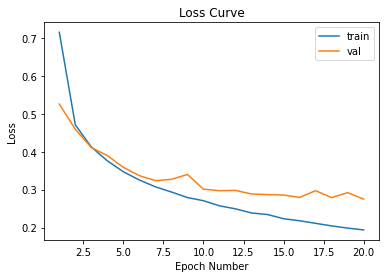

In [ ]:
plt.plot(x_axis, train_loss, label='train')
plt.plot(x_axis, val_loss, label='val')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

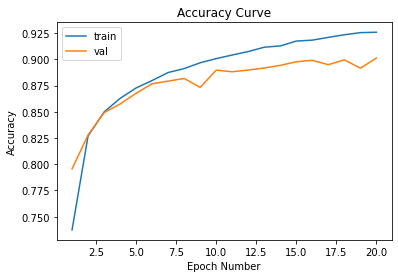

In [ ]:
plt.plot(x_axis, train_acc, label='train')
plt.plot(x_axis, val_acc, label='val')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')

## Additional Evaluation Metrics
### (Precision, Recall, Confusion Matrix)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.84      0.84      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.87      0.80      0.83      1000
     Class 3       0.89      0.91      0.90      1000
     Class 4       0.80      0.86      0.83      1000
     Class 5       0.97      0.97      0.97      1000
     Class 6       0.72      0.73      0.73      1000
     Class 7       0.94      0.97      0.96      1000
     Class 8       0.98      0.97      0.97      1000
     Class 9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
cnf_matrix = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred)
print(cnf_matrix)

[[836   0  19  20   4   1 115   0   5   0]
 [  2 974   0  14   2   0   8   0   0   0]
 [ 17   0 801  10  95   0  73   0   4   0]
 [ 16   8   7 907  35   0  22   0   5   0]
 [  2   1  35  37 864   0  60   0   1   0]
 [  1   0   0   1   0 973   0  16   0   9]
 [105   2  59  21  74   0 731   0   8   0]
 [  0   0   0   0   0  13   0 968   0  19]
 [  3   0   5   4   6   3   2   5 971   1]
 [  0   0   0   0   0  10   0  38   0 952]]
